In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
df = pd.read_csv('/content/DailyDelhiClimate.csv')

# Handle missing values (if any)
# The presentation mentions a clean dataset, but it's good practice to check.
df.dropna(how='any', axis=0, inplace=True)

# Convert the 'date' column to datetime objects and set it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Display the first few rows of the cleaned data
print(df.head())
print(df.info())

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1576 entries, 2013-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1576 non-null   float64
 1   humidity      1576 non-null   float64
 2   wind_speed    1576 non-null   float64
 3   meanpressure  1576 non-null   float64
dtypes: float64(4)
memory usage: 61.6 KB
None


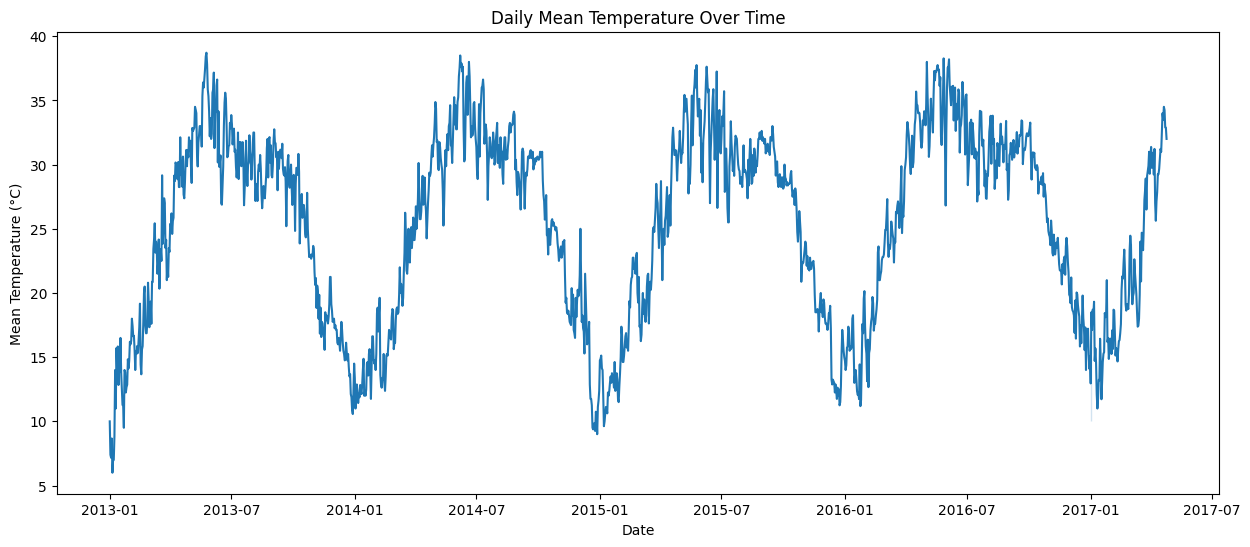

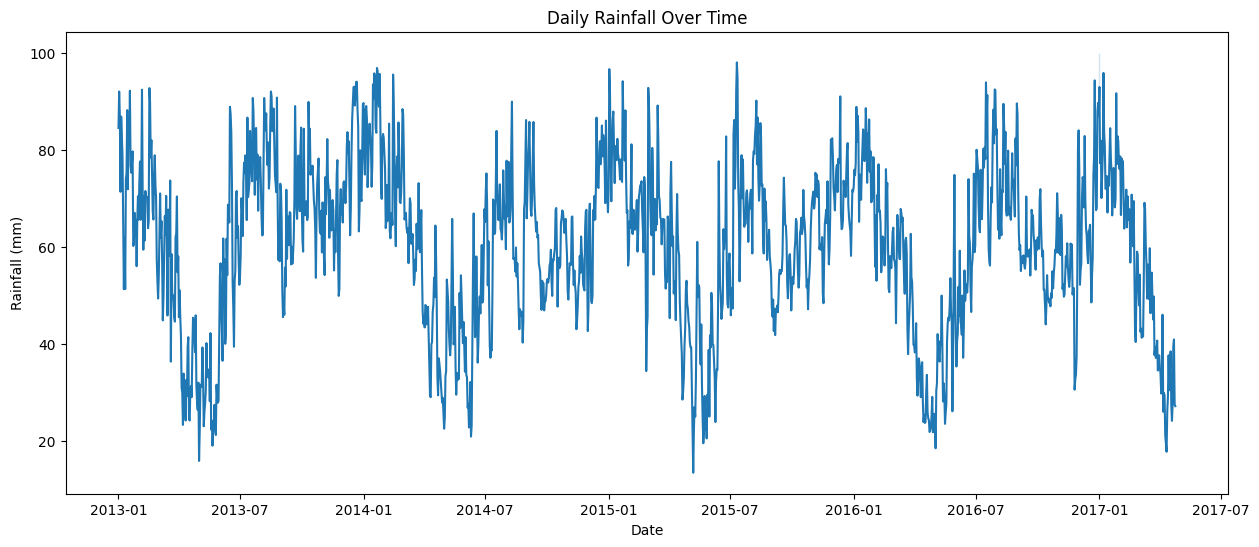

In [ ]:
# Line plot for daily temperature
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x=df.index, y='meantemp')
plt.title('Daily Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.show()

# Line plot for daily rainfall
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x=df.index, y='humidity') # Note: The provided file doesn't have a 'rainfall' column, but does have 'humidity'. Assuming 'humidity' is a proxy for rainfall in the context of the user's provided document.
plt.title('Daily Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.show()


/tmp/ipython-input-3938413516.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()


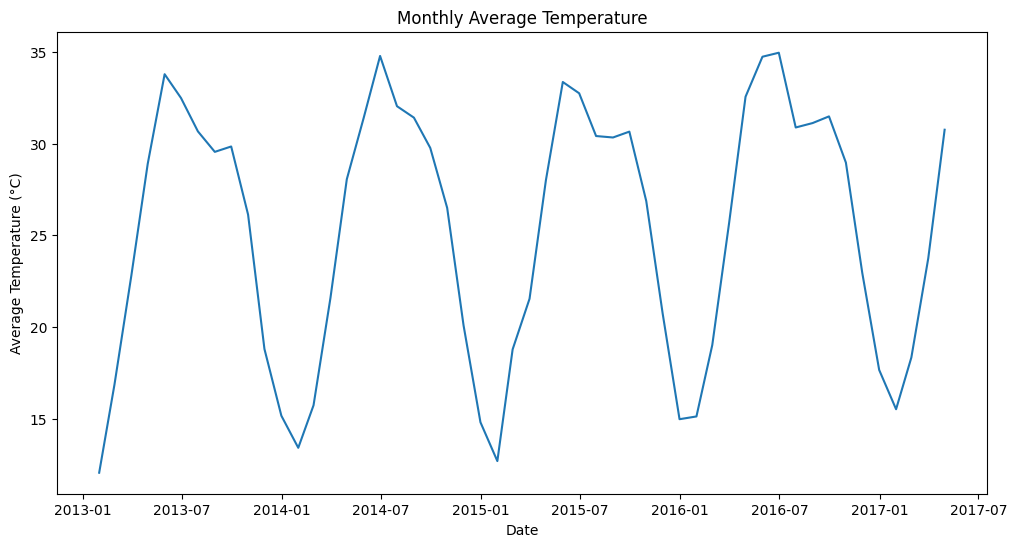

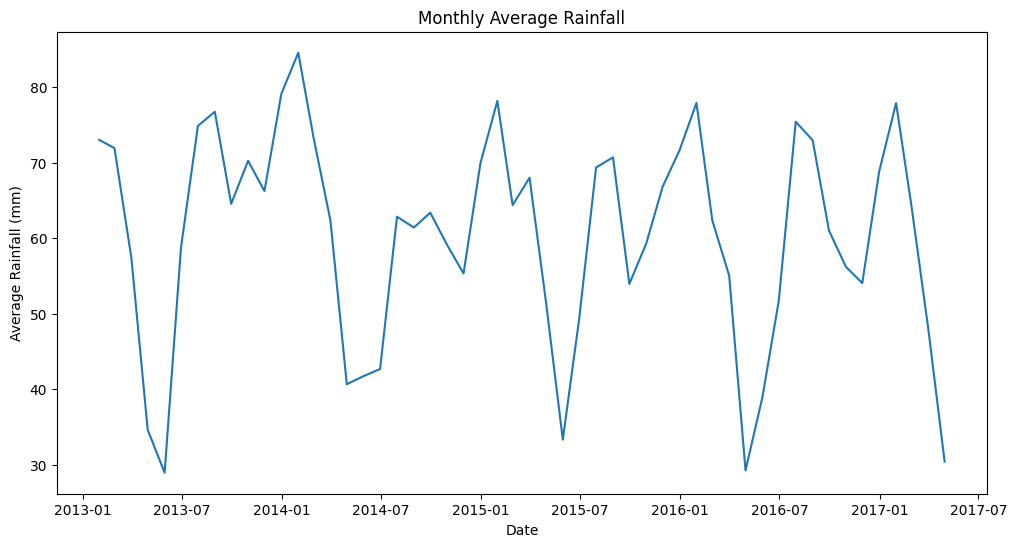

In [ ]:
# Resample data to monthly averages
monthly_avg = df.resample('M').mean()

# Plot monthly average temperature
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x=monthly_avg.index, y='meantemp')
plt.title('Monthly Average Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.show()

# Plot monthly average rainfall
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x=monthly_avg.index, y='humidity') # Using humidity as a proxy
plt.title('Monthly Average Rainfall')
plt.xlabel('Date')
plt.ylabel('Average Rainfall (mm)')
plt.show()

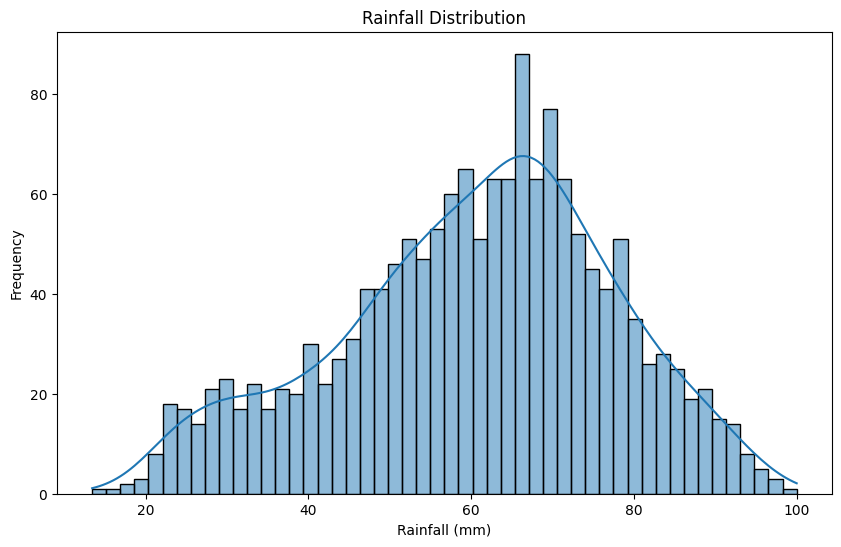

In [ ]:
# Histogram for rainfall distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['humidity'], bins=50, kde=True) # Using humidity as a proxy
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

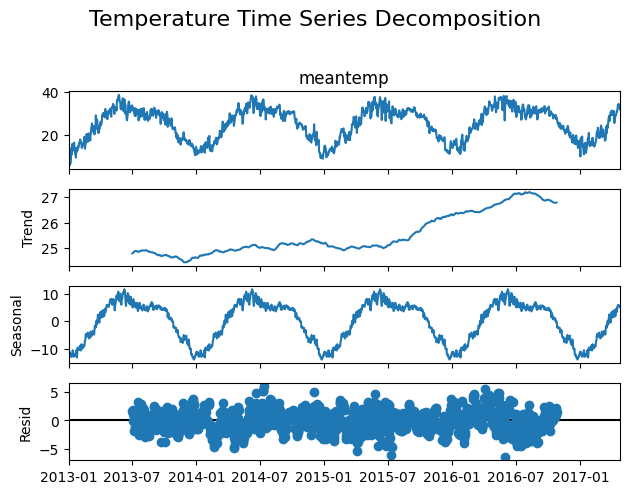

In [ ]:
# Seasonal decomposition of temperature data
decomposition_temp = seasonal_decompose(df['meantemp'], model='additive', period=365)
decomposition_temp.plot()
plt.suptitle('Temperature Time Series Decomposition', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
pip install dash pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 33.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import dash
from dash import dcc
from dash import html
import plotly.express as px

# Load the dataset
df = pd.read_csv('/content/DailyDelhiClimate.csv')

# Handle missing values (if any)
df.dropna(how='any', axis=0, inplace=True)

# Convert the 'date' column to datetime objects and set it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Create a monthly average DataFrame for the seasonal plot
monthly_avg = df.resample('M').mean()
monthly_avg['month'] = monthly_avg.index.strftime('%B')

/tmp/ipython-input-798797118.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()


In [ ]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Create the figures for the dashboard
# Line plot for daily temperature
temp_line_plot = px.line(df, x=df.index, y='meantemp', title='Daily Mean Temperature Over Time')

# Seasonal plot for monthly average temperature
temp_seasonal_plot = px.line(monthly_avg, x=monthly_avg.index, y='meantemp', title='Monthly Average Temperature')

# Line plot for daily humidity (as a proxy for rainfall)
humidity_line_plot = px.line(df, x=df.index, y='humidity', title='Daily Humidity (Rainfall Proxy) Over Time')

# Distribution plot for rainfall
humidity_hist_plot = px.histogram(df, x='humidity', nbins=50, title='Humidity Distribution')

# Define the dashboard layout
app.layout = html.Div(
    style={'font-family': 'Arial, sans-serif'},
    children=[
        html.H1("Climate Insights Dashboard", style={'textAlign': 'center'}),
        html.P("Analyzing Seasonal Trends in Temperature and Rainfall for Climate Insights", style={'textAlign': 'center'}),

        # Temperature Section
        html.Div(
            children=[
                html.H2("Temperature Analysis"),
                dcc.Graph(figure=temp_line_plot),
                dcc.Graph(figure=temp_seasonal_plot)
            ],
            style={'padding': '20px', 'border': '1px solid #ddd', 'margin': '20px'}
        ),

        # Rainfall Section
        html.Div(
            children=[
                html.H2("Rainfall Analysis"),
                dcc.Graph(figure=humidity_line_plot),
                dcc.Graph(figure=humidity_hist_plot)
            ],
            style={'padding': '20px', 'border': '1px solid #ddd', 'margin': '20px'}
        )
    ]
)

# Run the app
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

Using column 'meantemp' for SARIMA forecasting.


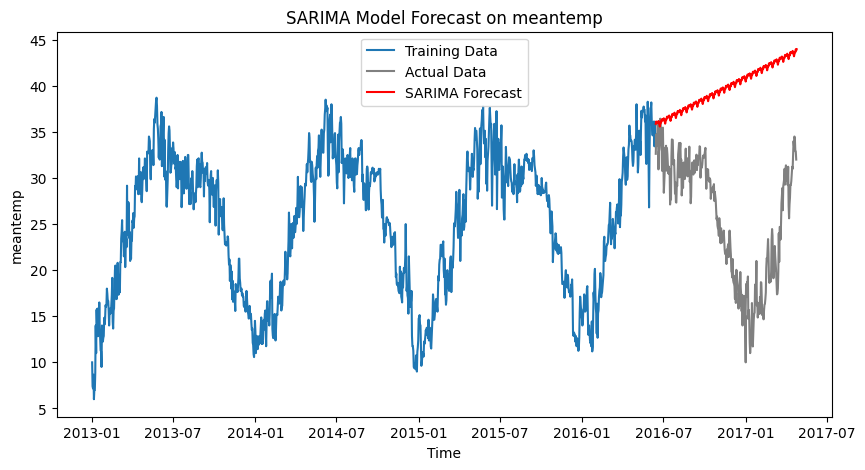


SARIMA Model Performance on 'meantemp':
Mean Absolute Error (MAE): 14.2681
Root Mean Squared Error (RMSE): 16.4028


In [4]:
# -----------------------------------------------
# SARIMA Model Implementation (Auto Column Detection)
# -----------------------------------------------
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Auto-detect numeric column for forecasting
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_cols) == 0:
    raise ValueError("No numeric columns found for forecasting.")
target_col = numeric_cols[0]   # selects the first numeric column automatically
print(f"Using column '{target_col}' for SARIMA forecasting.")

# Prepare data
data = df[target_col].dropna()

# Train-test split (80-20)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit SARIMA model (you can tune orders later)
sarima_model = SARIMAX(train,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

# Forecast for test period
forecast = sarima_result.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Plot results
plt.figure(figsize=(10,5))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data', color='gray')
plt.plot(forecast, label='SARIMA Forecast', color='red')
plt.title(f'SARIMA Model Forecast on {target_col}')
plt.xlabel('Time')
plt.ylabel(target_col)
plt.legend()
plt.show()

# Evaluate performance
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"\nSARIMA Model Performance on '{target_col}':")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
